# Predicting Price of House using KNearestNeighbour Regressor

Use KNearestNeighbourRegressor to Predict Price of House.

Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

1.Use pandas to get some insights into the data (10 marks)

2.Show some interesting visualization of the data (10 marks)

3.Manage data for training & testing (20)

4.Finding a better value of k (10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = r"https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt"

# 1.Use pandas to get some insights into the data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt",index_col='Unnamed: 0')
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [5]:
df.shape

(645, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [7]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [9]:
df[df.duplicated()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
22,2768.124,6,19,3,2,2,100000
27,3664.740,19,19,3,2,3,200000
33,2134.800,10,19,3,2,2,55000
49,3735.900,19,19,3,2,3,200000
100,2063.640,5,7,4,2,2,70000
...,...,...,...,...,...,...,...
614,2134.800,3,6,4,2,3,98000
618,711.600,8,14,1,1,1,36000
634,1167.024,2,12,3,2,2,38000
642,1707.840,9,15,3,2,2,80000


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [12]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

# 2.Show some interesting visualization of the data (10 marks)

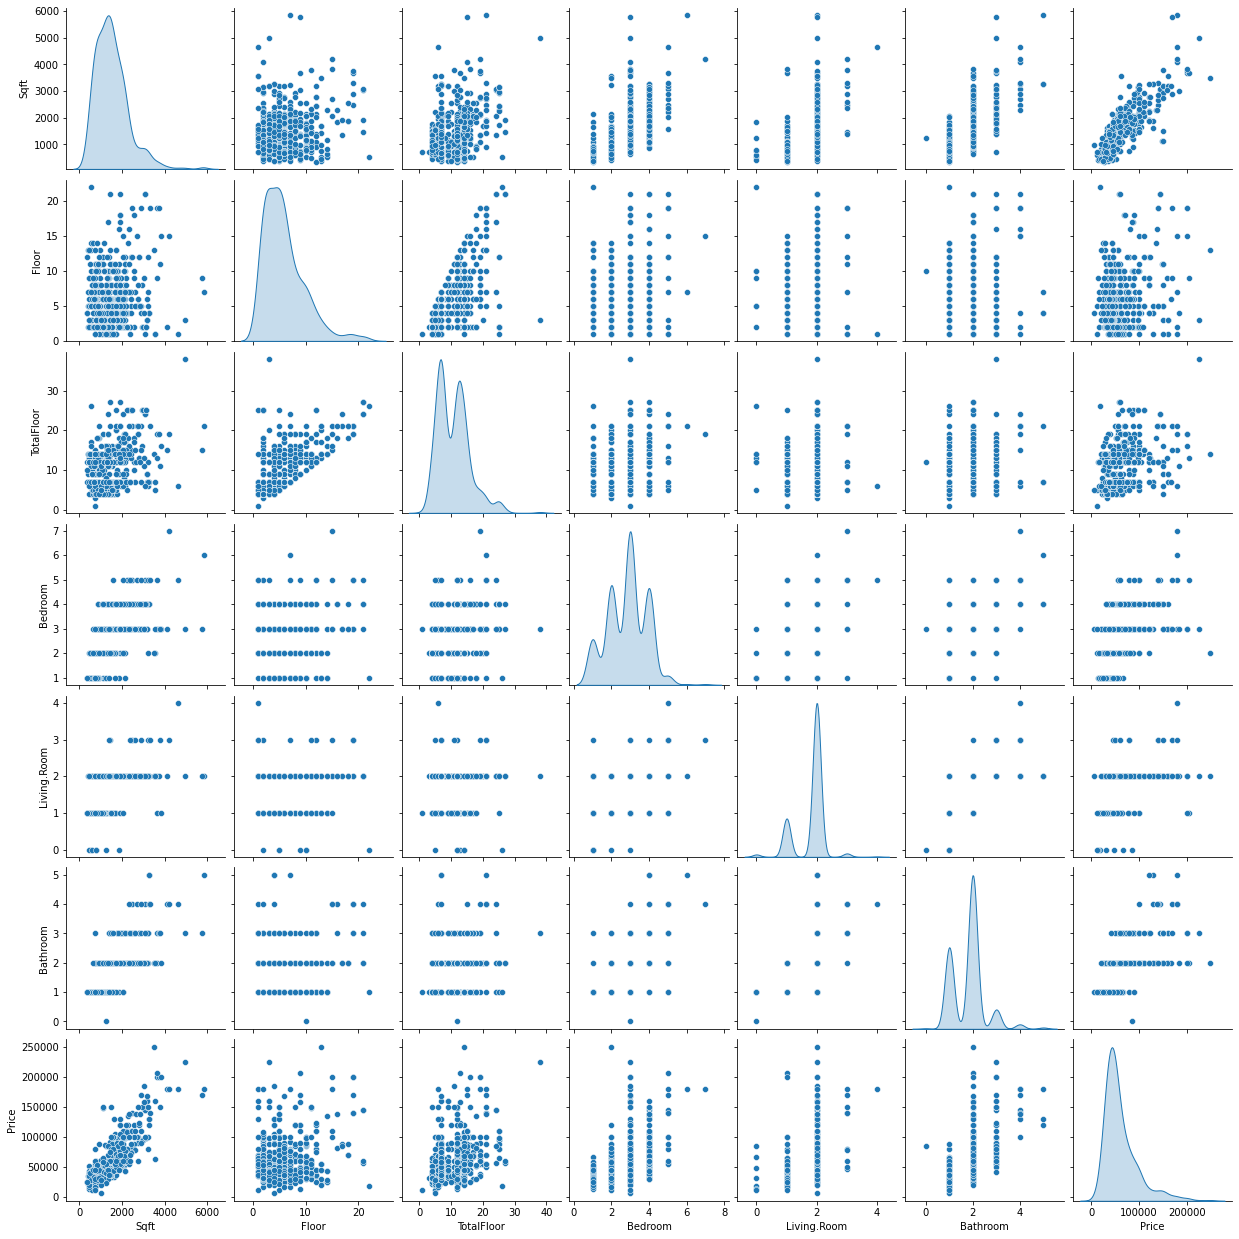

In [13]:
sns.pairplot(df, diag_kind = "kde")

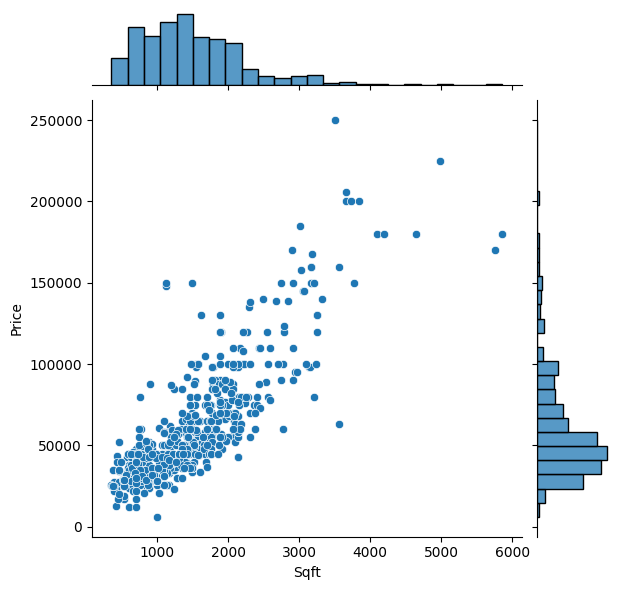

In [14]:
sns.jointplot(data=df, x="Sqft", y="Price")

In [15]:
df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.118568,0.304795,0.613589,0.458412,0.725545,0.823781
Floor,0.118568,1.000000,0.552552,0.039165,-0.025554,0.088359,0.226952
TotalFloor,0.304795,0.552552,1.000000,0.079984,0.023659,0.141258,0.336982
Bedroom,0.613589,0.039165,0.079984,1.000000,0.527463,0.650881,0.465091
Living.Room,0.458412,-0.025554,0.023659,0.527463,1.000000,0.559363,0.332643
Bathroom,0.725545,0.088359,0.141258,0.650881,0.559363,1.000000,0.604204
Price,0.823781,0.226952,0.336982,0.465091,0.332643,0.604204,1.000000


<AxesSubplot:>

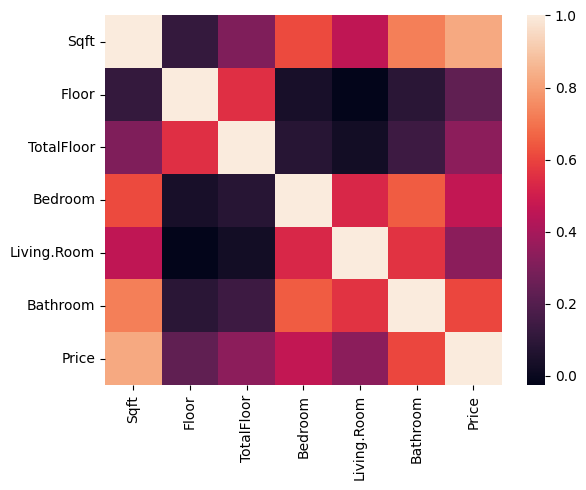

In [16]:
sns.heatmap(df.corr())

In [17]:
x = df.drop("Price",axis=1).values   #independent
y = df["Price"].values   #target or dependent

In [18]:
x

array([[1.177698e+03, 2.000000e+00, 7.000000e+00, 2.000000e+00,
        2.000000e+00, 2.000000e+00],
       [2.134800e+03, 5.000000e+00, 7.000000e+00, 4.000000e+00,
        2.000000e+00, 2.000000e+00],
       [1.138560e+03, 5.000000e+00, 7.000000e+00, 2.000000e+00,
        2.000000e+00, 1.000000e+00],
       ...,
       [3.771480e+02, 4.000000e+00, 1.000000e+01, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [7.400640e+02, 1.300000e+01, 1.400000e+01, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.376946e+03, 6.000000e+00, 7.000000e+00, 3.000000e+00,
        2.000000e+00, 1.000000e+00]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4)

In [21]:
x_train.shape

(347, 6)

In [22]:
y_train.shape

(347,)

In [23]:
x_test.shape

(232, 6)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import ceil, sqrt

In [25]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [26]:
y_pred = knr.predict(x_test)

In [27]:
sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

22314.773366991034

In [28]:
c = ceil(sqrt(df.shape[0]))

In [29]:
for i in range(0, c+1):
    model = KNeighborsRegressor()
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, y_test_pred))
    print(i , error)

0 22314.773366991034
1 22314.773366991034
2 22314.773366991034
3 22314.773366991034
4 22314.773366991034
5 22314.773366991034
6 22314.773366991034
7 22314.773366991034
8 22314.773366991034
9 22314.773366991034
10 22314.773366991034
11 22314.773366991034
12 22314.773366991034
13 22314.773366991034
14 22314.773366991034
15 22314.773366991034
16 22314.773366991034
17 22314.773366991034
18 22314.773366991034
19 22314.773366991034
20 22314.773366991034
21 22314.773366991034
22 22314.773366991034
23 22314.773366991034
24 22314.773366991034
25 22314.773366991034
